In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [4]:
raw_data = pd.read_csv('D:\downloads\misssions.csv')
raw_data

,STUDENT,SAT,GPA,"RAND 1,2,3",ADMITTANCE
0,A,1900,5.00,1,YES
1,B,1890,4.01,3,NO
2,C,1750,3.65,3,YES
3,D,1800,4.55,3,YES
4,E,1987,5.10,2,NO


In [7]:
data = raw_data.copy()
data['ADMITTANCE'] = data['ADMITTANCE'].map({'YES':1,'NO':1})
data

,STUDENT,SAT,GPA,"RAND 1,2,3",ADMITTANCE
0,A,1900,5.00,1,1
1,B,1890,4.01,3,1
2,C,1750,3.65,3,1
3,D,1800,4.55,3,1
4,E,1987,5.10,2,1


In [8]:
y = data['ADMITTANCE']
x1 = data['SAT']

In [19]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

         Current function value: 0.000000
         Iterations: 35


D:\anaconda\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
D:\anaconda\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
D:\anaconda\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
D:\anaconda\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
D:\anaconda\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: Pe

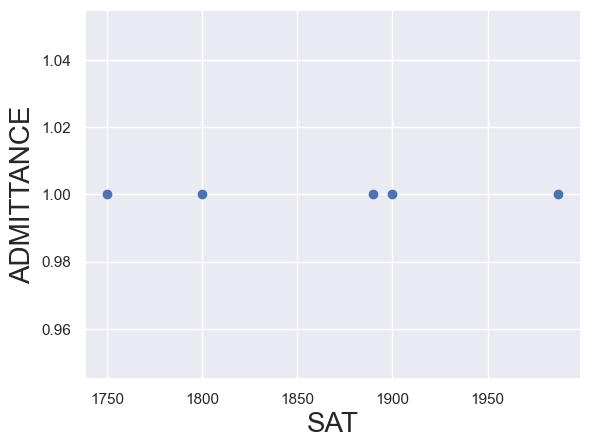

In [10]:
plt.scatter(x1,y,color='C0')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('ADMITTANCE',fontsize=20)
plt.show()

C:\Users\S\AppData\Local\Temp\ipykernel_10476\1879593532.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_hat = x1*results_lin.params[1]+results_lin.params[0]


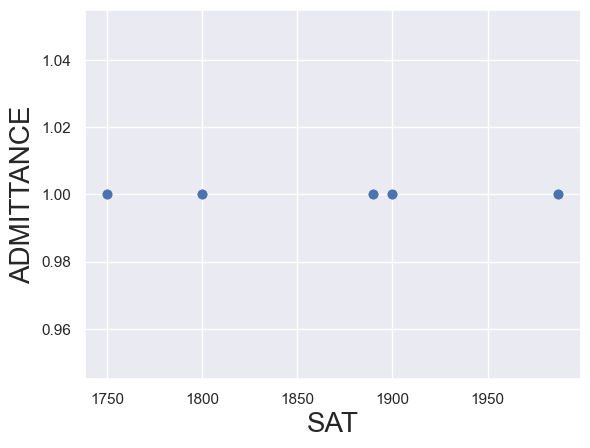

In [12]:
x = sm.add_constant(x1)
reg_lin = sm.OLS(y,x)
results_lin = reg_lin.fit()

plt.scatter(x1,y,color = 'C0')
y_hat = x1*results_lin.params[1]+results_lin.params[0]
plt.scatter(x1,y,color='C0')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('ADMITTANCE',fontsize=20)
plt.show()

D:\anaconda\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
D:\anaconda\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
D:\anaconda\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
D:\anaconda\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
D:\anaconda\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: Pe

         Current function value: 0.000000
         Iterations: 35


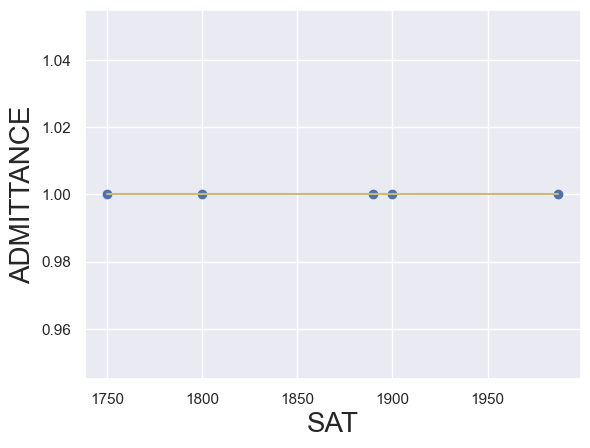

In [20]:
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1)/(1 + np.exp(b0 + x*b1)))

f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.array(x1))
plt.scatter(x1,y,color='C0')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('ADMITTANCE',fontsize=20)
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()